# Plotting

## 1. Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

In [2]:
df = pd.read_csv('dataset.csv', index_col='Timestamp')
df.head()

,Cell_000111,Cell_000112,Cell_000113,Cell_000231,Cell_000232,Cell_000233,Cell_000461,Cell_000462,Cell_000463,Cell_000821,...,Cell_006653,Cell_006661,Cell_006662,Cell_006663,Cell_007371,Cell_007372,Cell_007373,Cell_039871,Cell_039872,Cell_039873
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-10-23 00:00:00,29.26490,59.15291,59.01721,2.63658,14.11635,3.37565,7.69811,0.62042,0.74651,0.00000,...,36.89798,148.60854,98.66328,6.60830,0.82699,3.27327,80.90784,18.22045,6.99716,1.73569
2017-10-23 01:00:00,19.26170,60.22876,40.34814,13.16293,0.96246,7.47019,31.07216,0.52249,14.31437,19.78196,...,35.80842,11.13813,0.43016,1.45869,0.73014,0.35795,1.58017,38.19131,9.75174,7.38484
2017-10-23 02:00:00,18.37236,14.83900,1.27435,25.36683,1.07481,3.88256,26.14190,1.10567,27.31817,0.00000,...,42.86074,39.93543,0.28038,1.09835,0.38237,0.66306,0.75476,1.29435,3.66695,2.57090
2017-10-23 03:00:00,18.69268,0.98166,2.11746,1.66842,0.85055,14.04557,0.56444,0.50090,12.28002,0.00000,...,55.43529,10.91845,4.04031,5.95218,0.50307,0.26729,1.32703,1.01926,0.17117,11.62664
2017-10-23 04:00:00,21.62559,4.28219,3.51484,1.78151,0.71691,12.94846,27.45815,17.99582,5.18661,0.00033,...,16.57459,46.98406,0.89364,5.47769,4.58068,0.30167,1.20668,0.82393,123.40943,28.72087


## 2. Replace NaN

In [3]:
df.isna().sum().sum()

522

In [4]:
# new_df = df.interpolate(method='linear', axis=1) # linear interpolate
new_df = df.fillna(method='ffill', axis=1) # forward the last valid observation
new_df = df.fillna(0) # fill with 0s
new_df.isna().sum().sum()

0

In [5]:
df = new_df

## 2. Plot Cell Traffic

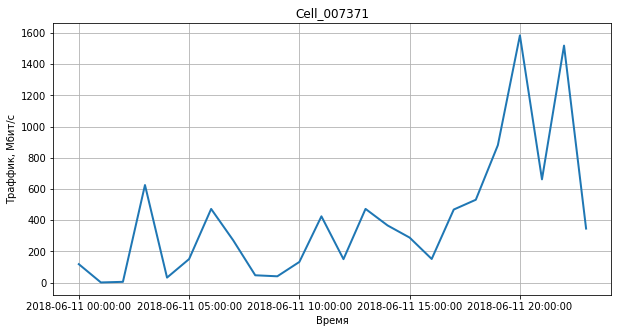

In [6]:
# day traffic
cellname = "Cell_007371"
ax = df.loc['2018-06-11':'2018-06-12', cellname].plot(figsize=(10,5),
                                                      x_compat=True,
                                                      grid=True,
                                                      linewidth=2)
ax.set_title(cellname)
ax.set_xlabel('Время')
ax.set_ylabel('Траффик, Мбит/с')
# save to a file
filename = cellname + '_day.png'
plt.savefig(filename)
plt.show()

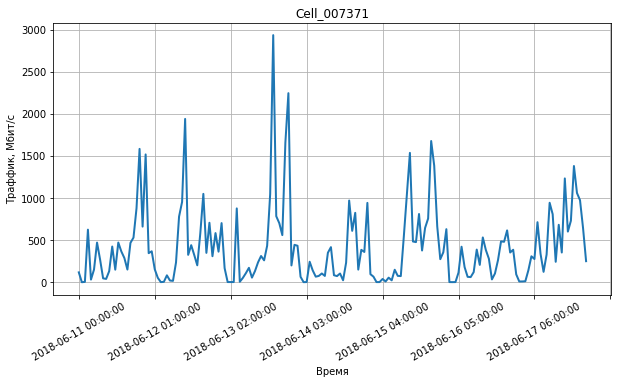

In [7]:
# week traffic
ax = df.loc['2018-06-11':'2018-06-18', cellname].plot(figsize=(10,5),
                                                      x_compat=True,
                                                      grid=True,
                                                      linewidth=2,
                                                      rot=30)
ax.set_title(cellname)
ax.set_xlabel('Время')
ax.set_ylabel('Траффик, Мбит/с')
# save to a file
filename = cellname + '_week.png'
plt.savefig(filename)
plt.show()

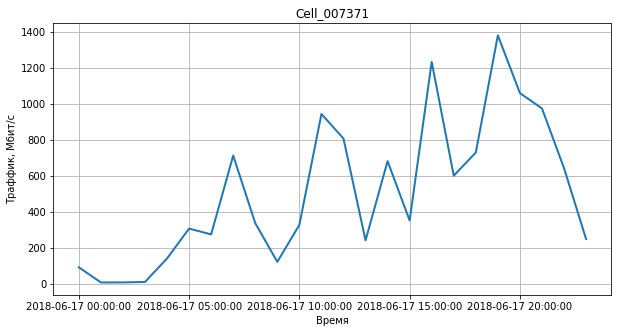

In [8]:
# week end traffic
ax = df.loc['2018-06-17':'2018-06-18', cellname].plot(figsize=(10,5),
                                                      x_compat=True,
                                                      grid=True,
                                                      linewidth=2,
                                                      rot=0)
ax.set_title(cellname)
ax.set_xlabel('Время')
ax.set_ylabel('Траффик, Мбит/с')
# save to a file
filename = cellname + '_weekend.png'
plt.savefig(filename)
plt.show()

## 3.Plot ACF and PACF

In [9]:
cell_traffic = df.loc['2018-06-11':'2018-06-14', cellname]

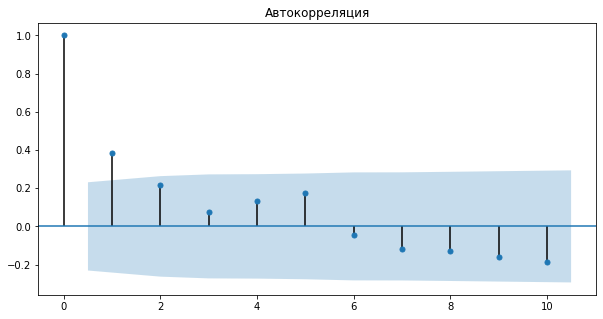

In [10]:
# plotting acf
fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_acf(cell_traffic, lags=10, ax=ax, title='Автокорреляция')
filename = cellname + '_ACF.png'
plt.savefig(filename)
plt.show()

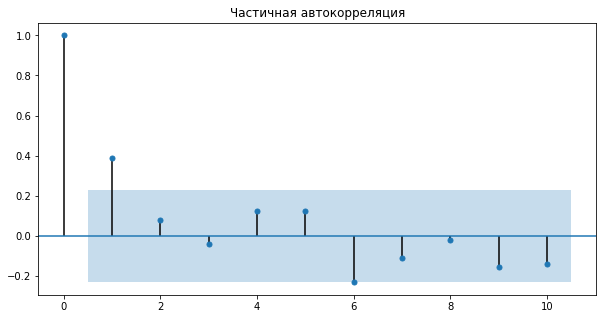

In [11]:
# plotting pacf
fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_pacf(cell_traffic, lags=10, ax=ax, title="Частичная автокорреляция")
filename = cellname + '_PACF.png'
plt.savefig(filename)
plt.show()

## 4.Augmented Dickey–Fuller test

In [12]:
result = sm.tsa.adfuller(cell_traffic)
print(f'ADF Statistic: {result[0]:.2f}')
print(f'p-value: {result[1]}')
print(f'Number of lags used in regression: {result[2]}')
print('Critical values:')
for k,v in result[4].items():
    print(f'\t{k}: {v:.2f}')

ADF Statistic: -5.55
p-value: 1.6196534309717094e-06
Number of lags used in regression: 0
Critical values:
	1%: -3.53
	5%: -2.90
	10%: -2.59


Interpretation of ADF:  
    1. Critical values: -4.14 <-3.53, -2.9, -2.59. Null-hypothisis can be rejected, TS is stational. 
    2. p-value < 0.05 (if take 95% confidence interval): null-hypothisis can be rejected,
    TS is stational.